In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold, cross_val_score

Data Reading

In [2]:
credit_card_data = pd.read_csv('credit_card_clients.csv')

In [8]:
credit_card_data.head(20)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-38.0,0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,-20.0,0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,-16.0,0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0,-17.0,0


In [5]:
credit_card_data.shape

(36457, 20)

In [6]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
ID                     36457 non-null int64
CODE_GENDER            36457 non-null object
FLAG_OWN_CAR           36457 non-null object
FLAG_OWN_REALTY        36457 non-null object
CNT_CHILDREN           36457 non-null int64
AMT_INCOME_TOTAL       36457 non-null float64
NAME_INCOME_TYPE       36457 non-null object
NAME_EDUCATION_TYPE    36457 non-null object
NAME_FAMILY_STATUS     36457 non-null object
NAME_HOUSING_TYPE      36457 non-null object
DAYS_BIRTH             36457 non-null int64
DAYS_EMPLOYED          36457 non-null int64
FLAG_MOBIL             36457 non-null int64
FLAG_WORK_PHONE        36457 non-null int64
FLAG_PHONE             36457 non-null int64
FLAG_EMAIL             36457 non-null int64
OCCUPATION_TYPE        25134 non-null object
CNT_FAM_MEMBERS        36457 non-null float64
begin_month            36457 non-null float64
target                 36457 non-null int

In [7]:
credit_card_data.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
begin_month                0
target                     0
dtype: int64

In [18]:
credit_card_data['OCCUPATION_TYPE'].describe()

count        25134
unique          18
top       Laborers
freq          6211
Name: OCCUPATION_TYPE, dtype: object

In [9]:
#As the cloumn Occupation has more than 30% null values ,so we can't drop it.

In [10]:
#Filling NA Values with "Unknown"

In [11]:
credit_card_data['OCCUPATION_TYPE'] = credit_card_data['OCCUPATION_TYPE'].fillna('Unknown')

In [12]:
credit_card_data.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
begin_month            0
target                 0
dtype: int64

In [13]:
#Checking Duplicates

In [14]:
credit_card_data.duplicated().sum()

0

In [15]:
#Checking Datatypes

In [16]:
credit_card_data.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
begin_month            float64
target                   int64
dtype: object

In [17]:
#Dropping of unneccessary column
credit_card_data.drop(['ID'], axis=1 , inplace =True)

EDA

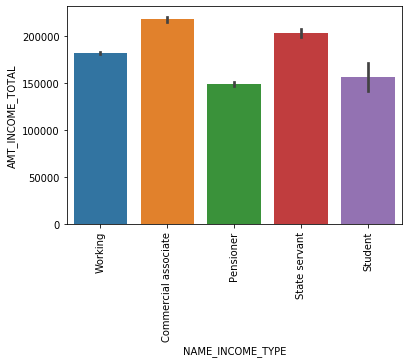

In [18]:
sns.barplot(x=credit_card_data['NAME_INCOME_TYPE'],y=credit_card_data['AMT_INCOME_TOTAL'])
plt.xticks(rotation='vertical')
plt.show()

Credit Card Holders are more in Commercial associate income type category

C:\Users\SAKSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


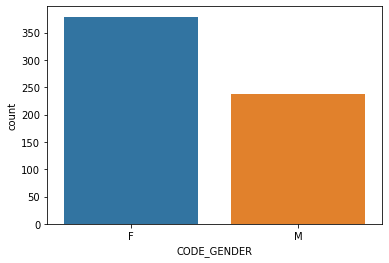

In [118]:
target_df = credit_card_data[credit_card_data['target'] == 1]
sns.countplot(target_df['CODE_GENDER'])
plt.show()

Target 1 indicates Good Client. So more no. of females are in Good Client Category

C:\Users\SAKSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


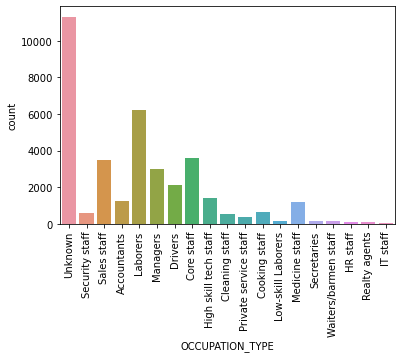

In [162]:
sns.countplot(credit_card_data['OCCUPATION_TYPE'])
plt.xticks(rotation='vertical')
plt.show()

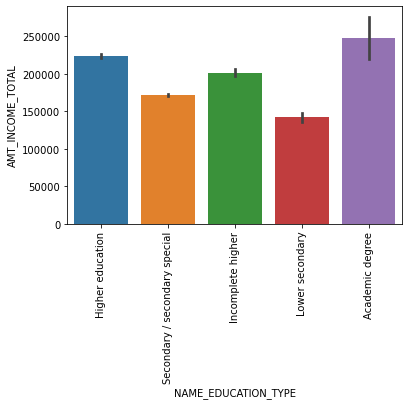

In [163]:
sns.barplot(x=credit_card_data['NAME_EDUCATION_TYPE'], y =credit_card_data['AMT_INCOME_TOTAL'])
plt.xticks(rotation='vertical')
plt.show()

Clients who completed Academic degree earn more than those who completed other education level.

C:\Users\SAKSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


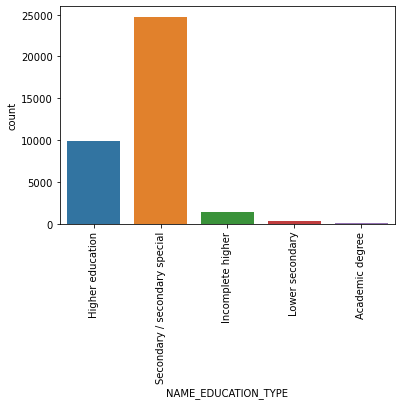

In [164]:
sns.countplot(credit_card_data['NAME_EDUCATION_TYPE'])
plt.xticks(rotation = 'vertical')
plt.show()

Maximum no. of clients are those who completed only Secondary/secondary speciallevel of education.

C:\Users\SAKSHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


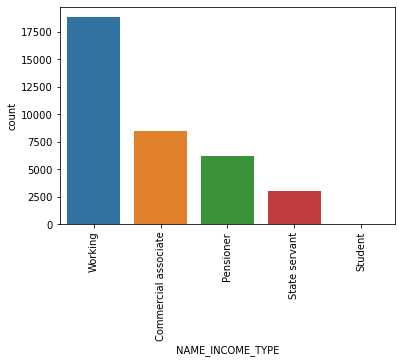

In [165]:
sns.countplot(credit_card_data['NAME_INCOME_TYPE'])
plt.xticks(rotation='vertical')
plt.show()

Maximum no. of clients are in Working Category.

Feature Engineering

In [166]:
credit_card_data['Age'] =  (-credit_card_data['DAYS_BIRTH'] / 365).round()

In [167]:
credit_card_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,target,Age
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,-15.0,0,33.0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Unknown,2.0,-14.0,0,33.0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0,59.0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0,52.0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0,52.0


In [168]:
credit_card_data.drop('DAYS_BIRTH',axis = 1,  inplace = True)

In [169]:
# adding column 'Professional_Experience in years' using 'DAYS_EMPLOYED'

In [170]:
credit_card_data['Professional_Experience(years)'] = -(credit_card_data['DAYS_EMPLOYED'] / 365).round()
credit_card_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,target,Age,Professional_Experience(years)
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,Unknown,2.0,-15.0,0,33.0,12.0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,Unknown,2.0,-14.0,0,33.0,12.0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2.0,-29.0,0,59.0,3.0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1.0,-4.0,0,52.0,8.0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1.0,-26.0,0,52.0,8.0


In [171]:
# giving value 0 for unemplyeed people
credit_card_data['Professional_Experience(years)'][credit_card_data['Professional_Experience(years)'] < 0] = 0    

C:\Users\SAKSHI\AppData\Local\Temp/ipykernel_18396/4194479570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_card_data['Professional_Experience(years)'][credit_card_data['Professional_Experience(years)'] < 0] = 0


In [172]:
credit_card_data.drop(['DAYS_EMPLOYED'],axis = 1, inplace = True)
credit_card_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,target,Age,Professional_Experience(years)
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2.0,-15.0,0,33.0,12.0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2.0,-14.0,0,33.0,12.0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,-29.0,0,59.0,3.0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,-4.0,0,52.0,8.0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,-26.0,0,52.0,8.0


In [173]:
credit_card_data['years'] = -(credit_card_data['begin_month']/12).round(1)
credit_card_data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,target,Age,Professional_Experience(years),years
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2.0,-15.0,0,33.0,12.0,1.2
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2.0,-14.0,0,33.0,12.0,1.2
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,-29.0,0,59.0,3.0,2.4
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,-4.0,0,52.0,8.0,0.3
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,-26.0,0,52.0,8.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Managers,2.0,-11.0,1,48.0,7.0,0.9
36453,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,2.0,-23.0,1,34.0,4.0,1.9
36454,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,2.0,-32.0,1,34.0,4.0,2.7
36455,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2.0,-9.0,1,49.0,2.0,0.8


In [174]:
credit_card_data.drop('begin_month', axis=1, inplace = True)
credit_card_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age,Professional_Experience(years),years
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2.0,0,33.0,12.0,1.2
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2.0,0,33.0,12.0,1.2
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,0,59.0,3.0,2.4
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,52.0,8.0,0.3
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,52.0,8.0,2.2


Encoding Categorial Variables

In [19]:
categorical_col = []
for column in credit_card_data.columns:
    if credit_card_data[column].dtype == object :
        categorical_col.append(column)

In [176]:
categorial_col =  ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


In [180]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    credit_card_data[column] = label.fit_transform(credit_card_data[column])

In [182]:
credit_card_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age,Professional_Experience(years),years
0,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,17,2.0,0,33.0,12.0,1.2
1,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,17,2.0,0,33.0,12.0,1.2
2,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,0,59.0,3.0,2.4
3,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,0,52.0,8.0,0.3
4,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,0,52.0,8.0,2.2


Scaling

In [183]:
credit_card_data['AMT_INCOME_TOTAL'] = (credit_card_data['AMT_INCOME_TOTAL'] - min(credit_card_data['AMT_INCOME_TOTAL'])) / (max(credit_card_data['AMT_INCOME_TOTAL']) - min(credit_card_data['AMT_INCOME_TOTAL']))

In [184]:
credit_card_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,Age,Professional_Experience(years),years
0,1,1,1,0,0.258721,4,1,0,4,1,1,0,0,17,2.0,0,33.0,12.0,1.2
1,1,1,1,0,0.258721,4,1,0,4,1,1,0,0,17,2.0,0,33.0,12.0,1.2
2,1,1,1,0,0.055233,4,4,1,1,1,0,0,0,16,2.0,0,59.0,3.0,2.4
3,0,0,1,0,0.156977,0,4,3,1,1,0,1,1,14,1.0,0,52.0,8.0,0.3
4,0,0,1,0,0.156977,0,4,3,1,1,0,1,1,14,1.0,0,52.0,8.0,2.2


In [191]:
X = credit_card_data.drop(['target'], axis=1)
y = credit_card_data['target']

In [192]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Model Building

Random Forest

In [188]:
from sklearn.model_selection import StratifiedKFold 

sk=StratifiedKFold(n_splits=5)
score=cross_val_score(RandomForestClassifier(n_estimators= 8, criterion="entropy"),X,y,cv=sk)
print(np.mean(score))

0.9794552500610729


SVM

In [197]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [199]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [200]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)
cm  

array([[10771,     0],
       [  167,     0]], dtype=int64)

In [201]:
from sklearn import metrics
print("SVM model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

SVM model accuracy(in %): 98.47321265313586
